In [ ]:
import tensorflow as tf
tf.random.set_seed(0)

import random
random.seed(0)

import numpy as np
np.random.seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle_credentials =  json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:10<00:00, 187MB/s]
100% 2.04G/2.04G [00:10<00:00, 211MB/s]


In [ ]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Soybean___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy']
38
['Soybean___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy']
38
['Soybean___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['f8f6d1ee-deb5-4b3c-a92e-2583e2d6d590___Mt.N.V_HL 6122.JPG', '944da534-67c1-4f04-8fa7-1e11492736ed___Mt.N.V_HL 6186.JPG', '3d4723f3-7abf-4f74-adf2-7313e64c8c09___Mt.N.V_HL 6162.JPG', '3a5b41ae-5cda-4d2f-9243-f3dc82a8dfbc___Mt.N.V_HL 9060.JPG', '1e126702-2613-4265-b2df-03648d947627___Mt.N.V_HL 9108.JPG']


In [ ]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


array([[[123, 135, 177],
        [124, 136, 178],
        [124, 136, 178],
        ...,
        [124, 137, 181],
        [129, 142, 186],
        [132, 145, 189]],

       [[123, 135, 177],
        [123, 135, 177],
        [123, 135, 177],
        ...,
        [124, 137, 181],
        [128, 141, 185],
        [131, 144, 188]],

       [[122, 134, 176],
        [122, 134, 176],
        [122, 134, 176],
        ...,
        [124, 137, 181],
        [126, 139, 183],
        [128, 141, 185]],

       ...,

       [[ 74,  86,  86],
        [ 64,  75,  77],
        [ 56,  65,  74],
        ...,
        [104, 103, 135],
        [106, 105, 137],
        [111, 110, 142]],

       [[ 58,  70,  70],
        [ 57,  68,  70],
        [ 60,  69,  78],
        ...,
        [108, 107, 139],
        [110, 109, 141],
        [116, 115, 147]],

       [[ 48,  60,  60],
        [ 54,  65,  67],
        [ 62,  71,  80],
        ...,
        [112, 111, 143],
        [114, 113, 145],
        [120, 119, 151]]], dtype=uint8)
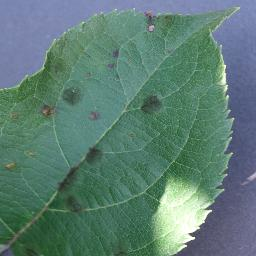

In [ ]:
img_path = "plantvillage dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG"
picture = mpimg.imread(img_path)
print(picture.shape)
picture

In [ ]:
image_size = 256
batch_size = 32

In [ ]:
data_generator = ImageDataGenerator(
    rescale= 1./255,
    validation_split= 0.2
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size= (image_size, image_size),
    batch_size= batch_size,
    subset= 'training',
    class_mode= 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    base_dir,
    target_size= (image_size, image_size),
    batch_size= batch_size,
    subset= 'validation',
    class_mode= 'categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

In [ ]:
train_generator.num_classes

38

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
1358/1358 [==============================] - 141s 98ms/step - loss: 1.0203 - accuracy: 0.7010 - val_loss: 0.4521 - val_accuracy: 0.8484
Epoch 2/10
1358/1358 [==============================] - 132s 97ms/step - loss: 0.3502 - accuracy: 0.8866 - val_loss: 0.3390 - val_accuracy: 0.8910
Epoch 3/10
1358/1358 [==============================] - 132s 97ms/step - loss: 0.1987 - accuracy: 0.9347 - val_loss: 0.3579 - val_accuracy: 0.8947
Epoch 4/10
1358/1358 [==============================] - 135s 99ms/step - loss: 0.1257 - accuracy: 0.9593 - val_loss: 0.3815 - val_accuracy: 0.8958
Epoch 5/10
1358/1358 [==============================] - 130s 96ms/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.3811 - val_accuracy: 0.8938
Epoch 6/10
1358/1358 [==============================] - 130s 96ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.3421 - val_accuracy: 0.9158
Epoch 7/10
1358/1358 [==============================] - 132s 98ms/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps= validation_generator.samples // batch_size)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

339/339 [==============================] - 21s 63ms/step - loss: 0.4908 - accuracy: 0.9002
Validation Accuracy: 90.02%


In [ ]:
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = np.expand_dims(image_array, axis= 0)
    image_array = image_array.astype('float32') / 255.
    return image_array

In [ ]:
def predict_image_class(model, image_path, class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Creating a mapping for Class Indices on Class Names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
pwd = os.getcwd()

In [ ]:
image_file_name = "plantvillage dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG"
image_path = os.path.join(pwd, "plantvillage dataset/color/Apple___Black_rot", image_file_name)
predict_class_name = predict_image_class(model, image_path, class_indices)
print('Predicted Class Name: ', predict_class_name)

1/1 [==============================] - 0s 18ms/step
Predicted Class Name:  Apple___Apple_scab
